<a href="https://colab.research.google.com/github/ivkarla/connectivity_change/blob/main/notebooks/Mi_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install statannot
from statannot import add_stat_annotation
from scipy.stats import shapiro

from google.colab import drive
drive.mount('/content/gdrive')

source = "/content/gdrive/Shared drives/A&K/data/AUC/"

Mounted at /content/gdrive


In [2]:
frames=["NN","N60S","NS","NE"]

xd,yd,hue=[],[],[]

for frame in frames:
    for it in range(1,6):
        if it==1: f = "AUC_4sigma_10_{}_c.xlsx".format(frame)
        else: f = "AUC-multi_4sigma_10_{}_comb{}_c.xlsx".format(frame,it)

        df = pd.read_excel(source+f)
        ytemp=list(df["AUC"])
        yd+=list(ytemp)
        xd+=[str(it)]*len(ytemp)

        if frame=="NS": hue+=["transition"]*len(ytemp)
        elif frame=="N60S": hue+=["pre-seizure"]*len(ytemp)
        elif frame=="NE": hue+=["seizure"]*len(ytemp)
        elif frame=="NN": hue+=["non-seizure"]*len(ytemp)

        stat,p = shapiro(ytemp)
        if p>0.05: print("normal")
        else: print("not normal")

datasorted = {"xd":xd,
      "hue_frame":hue,
      "yd":yd}

not normal
not normal
not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal
normal
not normal
not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal
normal
not normal
not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal
not normal
not normal
not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


not normal
not normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 0, 'Multiscore combination size')

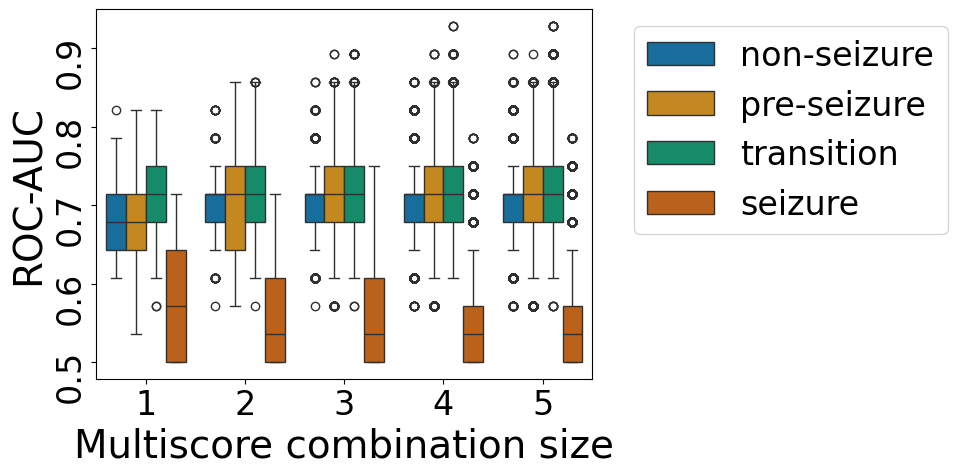

In [4]:
# bp=sns.boxplot(y="overlap", x="tick", data=data, palette="colorblind", width=0.5)
bp=sns.boxplot(y="yd", x="xd", data=datasorted, hue="hue_frame", palette="colorblind")
# bp=sns.stripplot(y="Result", x="Method", data=data, jitter=True, dodge=True, marker="o", alpha=0.8, hue="Outcome", color="grey")
# add_stat_annotation(bp, data=datasorted, x="xd", y="yd", hue="hue_frame",
#                                     box_pairs=[(('1',"transition"), ('1',"non-seizure")),
#                                                (('1',"transition"), ('1',"pre-seizure")),
#                                                (('1',"transition"), ('1',"seizure")),
#                                                (('2',"transition"), ('2',"non-seizure")),
#                                                (('2',"transition"), ('2',"pre-seizure")),
#                                                (('2',"transition"), ('2',"seizure")),
#                                                (('3',"transition"), ('3',"non-seizure")),
#                                                (('3',"transition"), ('3',"pre-seizure")),
#                                                (('3',"transition"), ('3',"seizure")),
#                                                (('4',"transition"), ('4',"non-seizure")),
#                                                (('4',"transition"), ('4',"pre-seizure")),
#                                                (('4',"transition"), ('4',"seizure")),
#                                                (('5',"transition"), ('5',"non-seizure")),
#                                                (('5',"transition"), ('5',"pre-seizure")),
#                                                (('5',"transition"), ('5',"seizure")),
#                                                (('1',"pre-seizure"), ('1',"non-seizure")),
#                                                (('2',"pre-seizure"), ('2',"non-seizure")),
#                                                (('3',"pre-seizure"), ('3',"non-seizure")),
#                                                (('4',"pre-seizure"), ('4',"non-seizure")),
#                                                (('5',"pre-seizure"), ('5',"non-seizure"))],
#                                     test='Mann-Whitney', text_format='star', fontsize="large", linewidth=2,
#                                     loc='inside', verbose=2)
handles, labels = bp.get_legend_handles_labels()
plt.legend(handles[0:len(frames)], labels[0:len(frames)], fontsize=24,bbox_to_anchor=(1.05, 1))
# plt.title("Network overlap", size=24)
plt.yticks(fontsize=24,rotation=90)
plt.xticks(fontsize=24)
plt.ylabel('ROC-AUC',fontsize=28)
plt.xlabel('Multiscore combination size',fontsize=28)